# Why Not to Use "squared error cost function" for Logistic Regression

## Introduction
In **Andrew Ng's Machine Learning** course in Coursera, Andrew mentioned that using we should use logistic cost function (`crossent_cost`) instead of squared error cost function (`squared_cost`) used in linear regression. This is because squared error cost function will cause a lot of wavy-like cost function, which will have a lot of local optimums. He said that the wavy-like property is due to the non-linear sigmoid function used in the logistic regression hypothesis `h`. And, why this matters is because, having multiple local minima in cost function is bad for gradient descent as it's harder to find the global minimum.

In this notebook, we show that using squared error cost function will indeed cause wavy-like functions.


\begin{equation}
h = sigmoid(x^T\theta)
\end{equation}

\begin{equation}
squared\_cost(\theta) = \frac{1}{2} (h - y)^2
\end{equation}

\begin{equation}
crossent\_cost(\theta) = y \cdot -log(h) + (1-y) \cdot -log(1-h)
\end{equation}

![Screenshot from Coursera Machine Learning Course](plot.png "Adapted from Coursera Machine Learning course")



#### Import libraries
* `numpy` for calculations
* `matplotlib` for plotting

In [576]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Prepare data for fitting

In [577]:
m = 100 # Number of instances
n = 2 # Number of features, n=1 usually does not give wavy cost function

X = np.random.rand(m, n) 

real_theta = np.random.rand(n) * 10 # This is the actual parameters

y = X.dot(real_theta.T) 
y = (y >= y.mean()) * 1 # This is the actual labels

X += np.random.randn(m, n) # Optional: Add noise to data (Easier to get wavy cost function)

#### Define methods:
* sigmoid function - used in logistic regression
* squared error function
* logistic loss function

In [578]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def compute_square_cost(theta, X, y):
    h = sigmoid(np.dot(X, theta).reshape(-1, 1))
    return np.sum((h - y)**2)

def compute_crossent_cost(theta, X, y):
    h = sigmoid(np.dot(X, theta).reshape(-1, 1))
    a = np.dot(y.T, -np.log(h))
    b = np.dot((1-y).T, -np.log(1-h))
    return np.sum(a + b)

#### Main
* We will compute and record the value of both cost function, by manipulating `theta[1]` from -30 to +30
* The results are saved in square_cost and crossent_cost

In [579]:
## MAIN

# For simplicity, we will only plot one parameter against the cost function, that's why t1s only has 1 value.
t1s = [real_theta[0]]
t2s = np.linspace(-30, 30, 1000)

square_cost = []
crossent_cost = []

for t1 in t1s:
    for t2 in t2s:
        square_cost.append([t2, compute_square_cost([t1,t2], X, y)])
        crossent_cost.append([t2, compute_crossent_cost([t1,t2], X, y)])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


#### Plotting the Squared Error Cost Function
* Notice that it is wavy and it has multiple local optima
* If it's not the case, try to rerun the whole notebook

Text(0.5, 1.0, 'Squared Error Cost Function (Non-convex Function)')

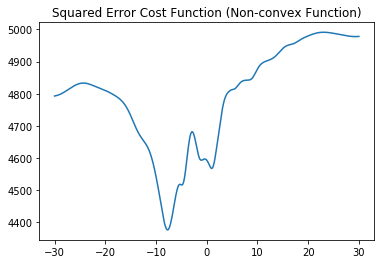

In [580]:
a = np.array(square_cost)
a = a[a[:,0].argsort()]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(a[:,0], a[:,1])
plt.title('Squared Error Cost Function (Non-convex Function)')

#### Plotting the Logistic Cost Function
* Notice that it is a convex function, not wavy.
* This cost function is smooth and good for gradient descent

Text(0.5, 1.0, 'Logistic Cost Function (Convex Function)')

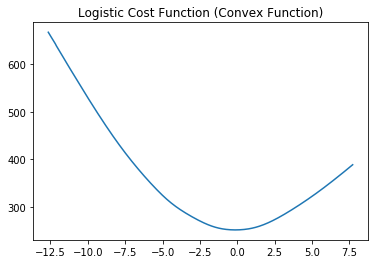

In [581]:
a = np.array(crossent_cost)
a = a[a[:,0].argsort()]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(a[:,0], a[:,1])
plt.title('Logistic Cost Function (Convex Function)')